# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
def custom_median(mass):
    sum_of_charges = []
    for i in mass:
        try: sum_of_charges.append(float(i))
        except: continue
    return np.median(sum_of_charges)

def replace_errors(value):
    median = custom_median(main['totalcharges'].values)
    try: return float(value)
    except: return median

In [3]:
main = pd.read_csv('telecom_users.csv', index_col=0)
main.columns = [col.lower() for col in main.columns]
main.head(3)

prepocessed_data = main.copy()

In [4]:
print(main.info())

try:
    main['totalcharges'].astype('float')
except: print('Колонка TotalChrages содержит поврежденные данные')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   seniorcitizen     5986 non-null   int64  
 3   partner           5986 non-null   object 
 4   dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   phoneservice      5986 non-null   object 
 7   multiplelines     5986 non-null   object 
 8   internetservice   5986 non-null   object 
 9   onlinesecurity    5986 non-null   object 
 10  onlinebackup      5986 non-null   object 
 11  deviceprotection  5986 non-null   object 
 12  techsupport       5986 non-null   object 
 13  streamingtv       5986 non-null   object 
 14  streamingmovies   5986 non-null   object 
 15  contract          5986 non-null   object 
 16  paperlessbilling  5986 non-null   object

Колонка totalcharges содержит поврежденные данные, заменим их на медианное значение.

In [5]:
from sklearn.preprocessing import OrdinalEncoder

prepocessed_data['totalcharges'] = main['totalcharges'].apply(replace_errors).astype(float)
o = OrdinalEncoder()

for col in prepocessed_data.columns[1:]:
    if prepocessed_data[col].dtype == 'O':
        prepocessed_data[col] = o.fit_transform(prepocessed_data[col].values.reshape(-1,1))


In [6]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
prepocessed_data['churn'] = l.fit_transform(main['churn'])

In [7]:
data = prepocessed_data.drop(['customerid', 'churn'], axis=1)
target = prepocessed_data['churn']

# 2. Исследование зависимостей и формулирование гипотез

In [8]:
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split

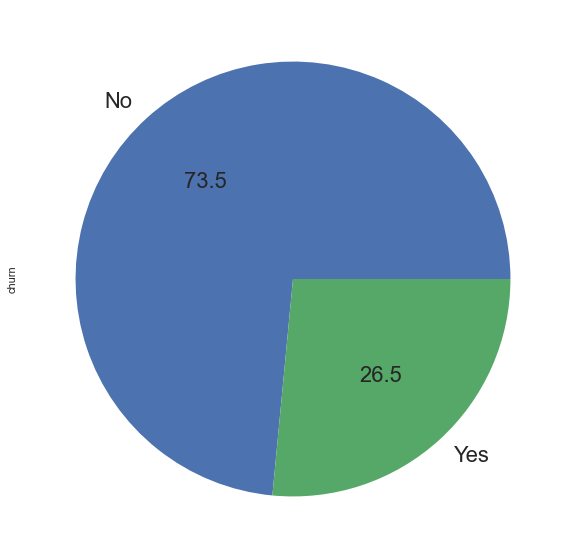

Коеффициент балансировки:  2.7718966603654693


In [9]:
main.churn.value_counts().plot.pie(figsize=(10,10), autopct='%.1f', fontsize=22)

plt.show()
coef = main.churn.value_counts()[0]/ main.churn.value_counts()[1]
print('Коеффициент балансировки: ', coef)

Классы несбалансированы: 73.5% данных относятся к not churn, а 26.5% к churn

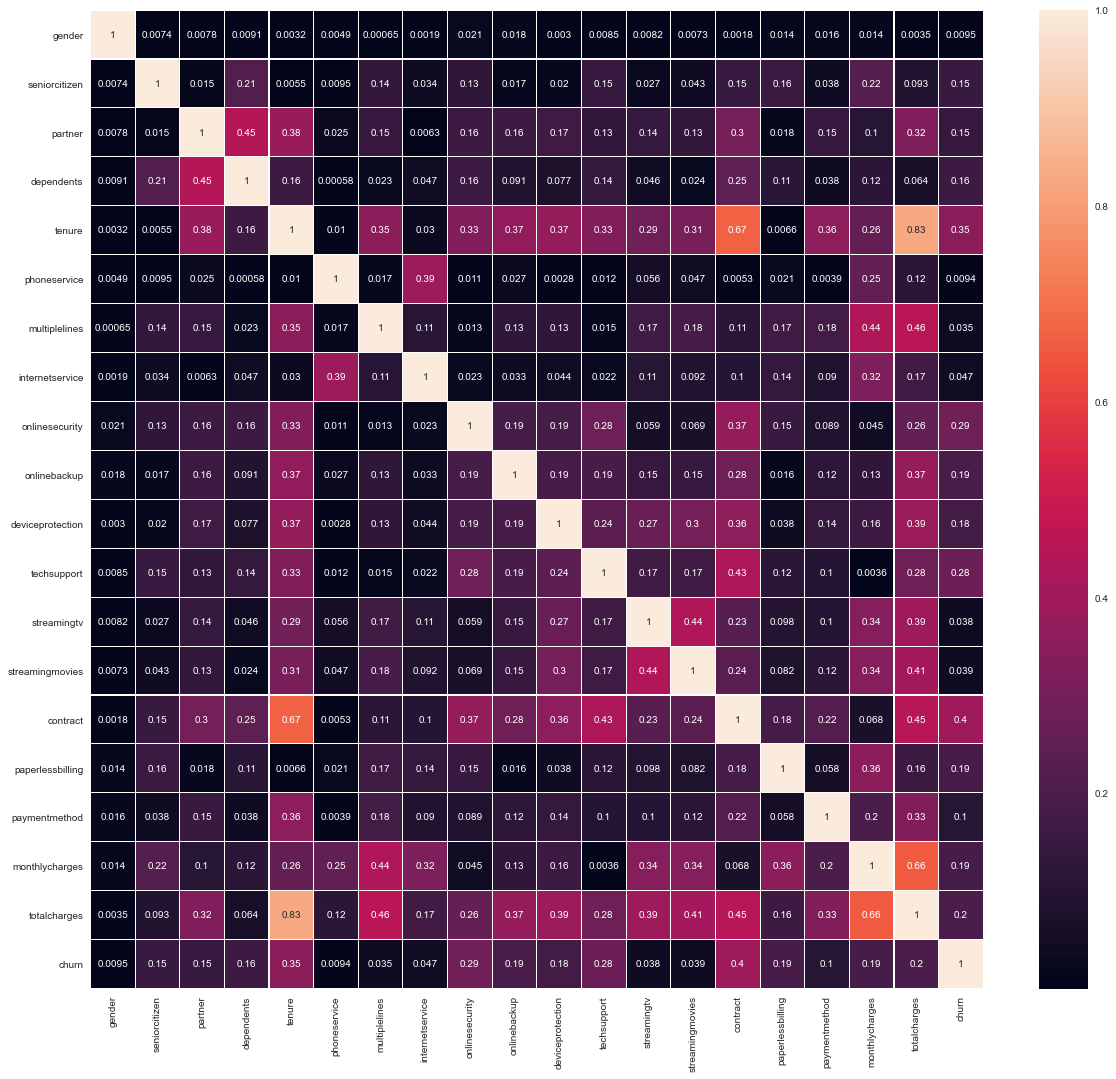

In [10]:
plt.figure(figsize=(20, 18))
cor = prepocessed_data.corr()
sns.heatmap(abs(cor), linewidths=.1,  annot=True)
plt.show()

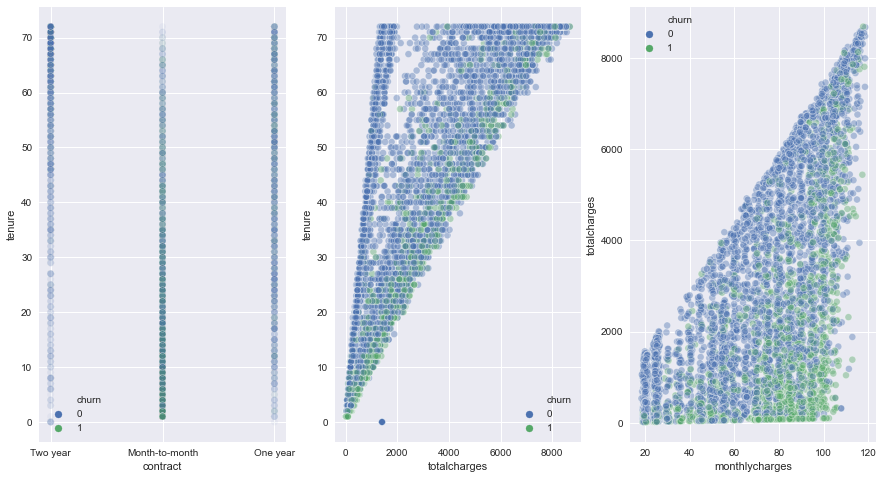

In [11]:
figure, ax = plt.subplots(1,3, figsize=(15,8))

sns.scatterplot(data=main, x='contract', y='tenure', hue=target, ax=ax[0], alpha=0.05)
sns.scatterplot(data=data, x='totalcharges', y='tenure', hue=target, ax=ax[1], alpha=0.4)
sns.scatterplot(data=data, x='monthlycharges', y='totalcharges', hue=target, ax=ax[2], alpha=0.4)
ax[2].legend(loc=2)
plt.show()

Удалим излишние признаки и отмасштабируем данные 

In [12]:
data = data.drop(['totalcharges', 'contract', ], axis=1)
scalered_data = pd.DataFrame(minmax_scale(data), columns = data.columns)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(scalered_data,
                                                    target, test_size=.3, random_state=17, stratify=target)

# 3. Построение моделей для прогнозирования оттока

In [14]:
def clf_report(clf, x_test, y_test, graph=False, features=False):    
    
    try:
        
        clf = clf.best_estimator_
        
    except: pass
        
    print('Algoritm:', clf, '\n')
    
    y_predicted_proba = clf.predict_proba(x_test)[:,1]
    y_predicted = clf.predict(x_test)
    
    print('Confusion matrix:\n', confusion_matrix(y_test, y_predicted), '\n')    
    print('classification report:\n', classification_report(y_test, y_predicted), '\n')
    print ('ROC AUC score: ', roc_auc_score(y_test, y_predicted_proba))
    plot_roc_curve(clf, x_test, y_test)
    plt.show()
        
    if features:
        
        df = pd.DataFrame([data.columns, clf.feature_importances_],
                     index=['features', 'features_importance']).T.\
                     sort_values('features_importance', ascending=False)
    
        plt.figure(figsize=(12,7))
        sns.barplot(data=df, x='features', y='features_importance')
        plt.xticks(rotation=45)

        plt.show()
    
    if graph:

        dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=data.columns,  
                                class_names=["No", "Yes"],  
                                filled=True)  
        plt.show()
        display(graphviz.Source(dot_data))
        

    

    

In [15]:
def train_clf(clf, params, cv, data):
    
    return GridSearchCV(clf, params, cv=skf, scoring='roc_auc').fit(data[0], data[1])

### 3.1 KNeighbors Classifier

In [16]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             roc_auc_score,
                             accuracy_score,
                             recall_score, 
                             precision_score, 
                             f1_score)

Wall time: 45.2 ms


Algoritm: KNeighborsClassifier(n_neighbors=8) 

Confusion matrix:
 [[1197  123]
 [ 300  176]] 

classification report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1320
           1       0.59      0.37      0.45       476

    accuracy                           0.76      1796
   macro avg       0.69      0.64      0.65      1796
weighted avg       0.74      0.76      0.74      1796
 

ROC AUC score:  0.7667549974535268


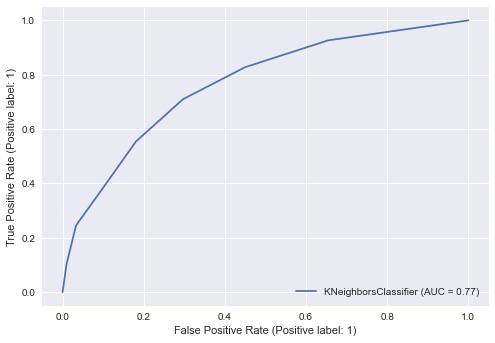

Wall time: 2.78 s


In [17]:
%%time
skf = StratifiedKFold(n_splits=5)

knn_params = {'n_neighbors':np.arange(3,10)}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=skf).fit(x_train, y_train)

clf_report(knn, x_test, y_test)

### 3.2 Naive Bayes

Algoritm: GaussianNB() 

Confusion matrix:
 [[1071  249]
 [ 162  314]] 

classification report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1320
           1       0.56      0.66      0.60       476

    accuracy                           0.77      1796
   macro avg       0.71      0.74      0.72      1796
weighted avg       0.79      0.77      0.78      1796
 

ROC AUC score:  0.8127323656735421


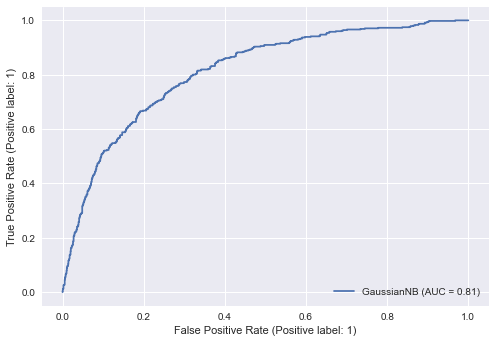

Wall time: 116 ms


In [18]:
%%time
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(x_train, y_train)
clf_report(nb, x_test, y_test)

### 3.3 Decision Tree Classifier

Algoritm: DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=15,
                       random_state=17) 

Confusion matrix:
 [[972 348]
 [117 359]] 

classification report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1320
           1       0.51      0.75      0.61       476

    accuracy                           0.74      1796
   macro avg       0.70      0.75      0.71      1796
weighted avg       0.79      0.74      0.75      1796
 

ROC AUC score:  0.8186147186147186


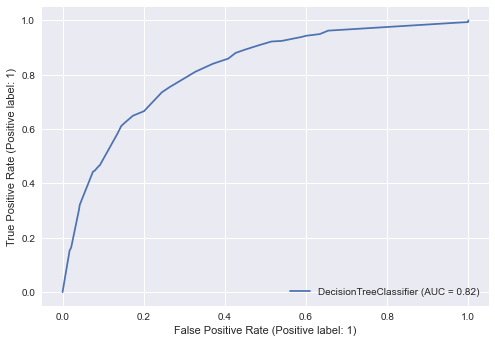

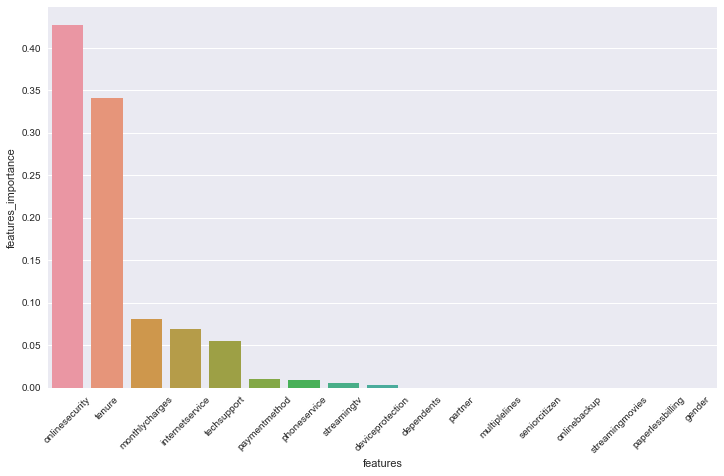

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

Wall time: 5.11 s


In [19]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

skf=StratifiedKFold(n_splits=5)

dt_params = {'max_depth': np.arange(1,11), 'max_features': np.arange(3,16) }
dt = train_clf(DecisionTreeClassifier(random_state=17, class_weight='balanced'),
               dt_params, cv=skf, data=[x_train, y_train])

clf_report(dt, x_test, y_test, graph=True, features=True)


### 3.4 Random Forest Classifier

Algoritm: RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=6,
                       n_estimators=360) 

Confusion matrix:
 [[997 323]
 [107 369]] 

classification report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1320
           1       0.53      0.78      0.63       476

    accuracy                           0.76      1796
   macro avg       0.72      0.77      0.73      1796
weighted avg       0.81      0.76      0.77      1796
 

ROC AUC score:  0.8398594665138783


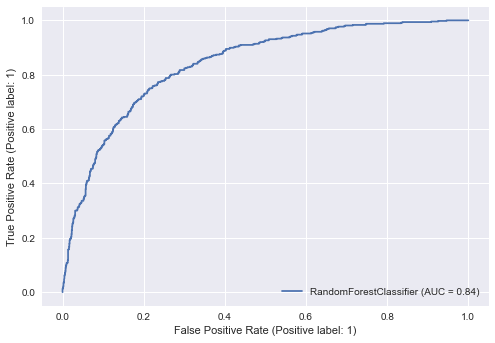

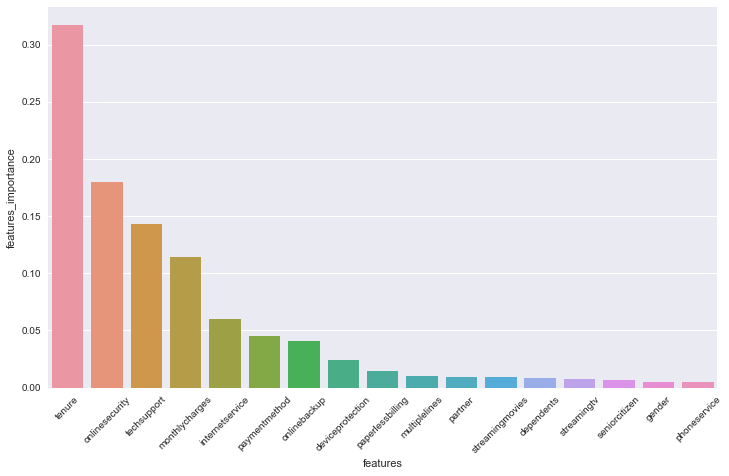

Wall time: 1.44 s


In [29]:
%%time
from sklearn.ensemble import RandomForestClassifier

rfc_params = {'max_depth': np.arange(3,16), 'max_features': np.arange(3,16),
              'n_estimators': np.arange(100,400,10)}
# rfc = train_clf(RandomForestClassifier(class_weight='balanced'),rfc_params, cv=skf, data=[x_train, y_train])

best_conf_rfc = RandomForestClassifier(max_depth=6, max_features=6, n_estimators=360,
                                       class_weight='balanced')
rfc = best_conf_rfc.fit(x_train, y_train)

clf_report(rfc, x_test, y_test, features=True)

### 3.5 Support Vector Machine

Algoritm: SVC(C=1.2, class_weight='balanced', kernel='linear', probability=True) 

Confusion matrix:
 [[970 350]
 [108 368]] 

classification report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1320
           1       0.51      0.77      0.62       476

    accuracy                           0.74      1796
   macro avg       0.71      0.75      0.71      1796
weighted avg       0.80      0.74      0.76      1796
 

ROC AUC score:  0.8348739495798319


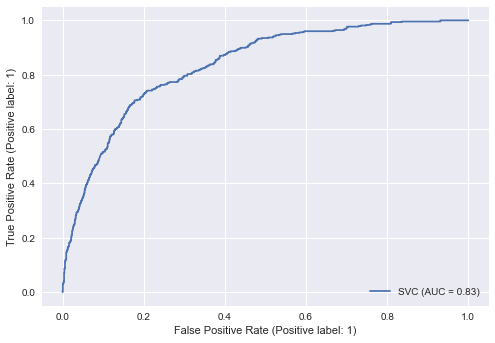

Wall time: 2min 10s


In [21]:
%%time
from sklearn.svm import SVC


svc_params = {'C': np.arange(1, 2, 0.2), 'kernel': ['linear', 'poly', 'sigmoid']}

svc = train_clf(SVC(class_weight='balanced', probability=True), svc_params, cv=skf, data=[x_train, y_train])

clf_report(svc, x_test, y_test)


### 3.6 Extreme Gradient Boosting

Algoritm: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=6, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, random_state=17, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2.7718966603654693, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 

Confusion matrix:
 [[1004  316]
 [ 117  359]] 

classification report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1320
           1       0.53      0.75      0.62       476

    accuracy                           0.76      1796
   macro avg       0.71      0.76      0.72      1796


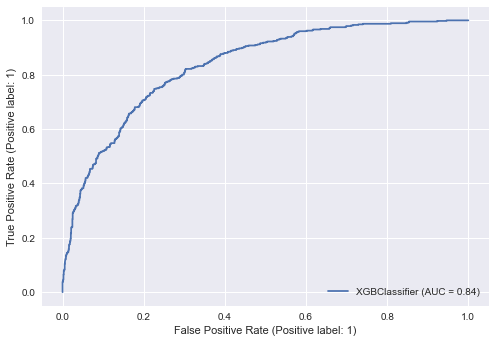

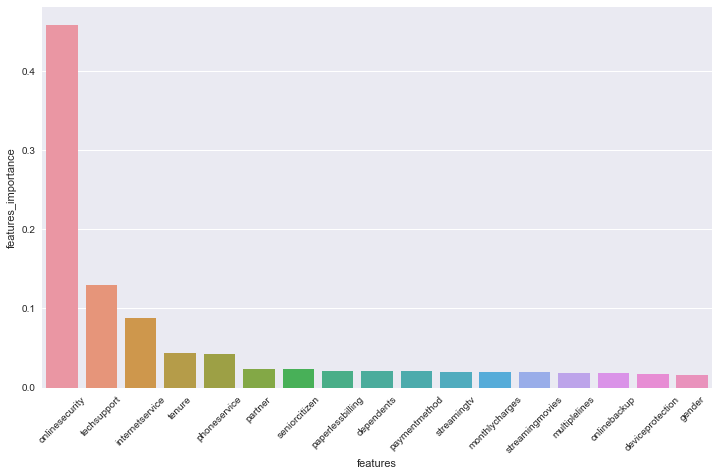

Wall time: 463 ms


In [28]:
%%time
from xgboost import XGBClassifier
from xgboost import DMatrix

xgb_params = {'n_estimators': range(100, 400, 10),
              'eta': np.arange(0.1, 2, .2),
              'min_child_weight':  range(1, 10, 2),
              'subsample': np.arange(0.1, 1., 0.2)}

# xgb = train_clf(XGBClassifier(random_state=17, eval_metric = 'error'), 
#                  xgb_params, cv=skf, data=[x_train, y_train])

best_conf_xgb = XGBClassifier(eta=0.1, eval_metric='error', min_child_weight=7,
                            n_estimators=100,random_state=17,scale_pos_weight=coef)
xgb = best_conf_xgb.fit(x_train, y_train)

clf_report(xgb, x_test, y_test, features=True)


### 3.7 Logistic Regression

Algoritm: LogisticRegression(C=1.5999999999999999, random_state=17) 

Confusion matrix:
 [[1200  120]
 [ 235  241]] 

classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1320
           1       0.67      0.51      0.58       476

    accuracy                           0.80      1796
   macro avg       0.75      0.71      0.72      1796
weighted avg       0.79      0.80      0.79      1796
 

ROC AUC score:  0.835270244461421


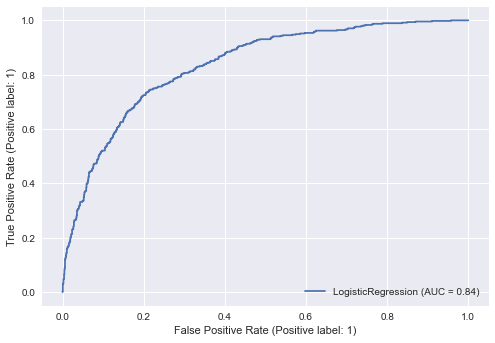

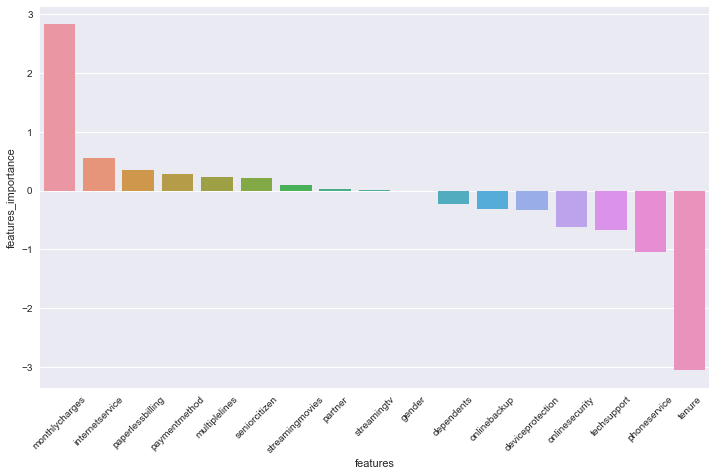

Wall time: 915 ms


In [23]:
%%time
from sklearn.linear_model import LogisticRegression

lr_params = {'C': np.arange(1,3,0.2)}

lr = train_clf(LogisticRegression(random_state=17,),
               lr_params, cv=skf, data=[x_train, y_train])
clf_report(lr, x_test, y_test)

df = pd.DataFrame([data.columns, lr.best_estimator_.coef_[0]],
                     index=['features', 'features_importance']).T.\
                     sort_values('features_importance', ascending=False)
    
plt.figure(figsize=(12,7))
sns.barplot(data=df, x='features', y='features_importance')
plt.xticks(rotation=45)

plt.show()

### 3.8 Adaptive Boosting

Algoritm: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=17) 

Confusion matrix:
 [[1197  123]
 [ 233  243]] 

classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1320
           1       0.66      0.51      0.58       476

    accuracy                           0.80      1796
   macro avg       0.75      0.71      0.72      1796
weighted avg       0.79      0.80      0.79      1796
 

ROC AUC score:  0.8378254710975299


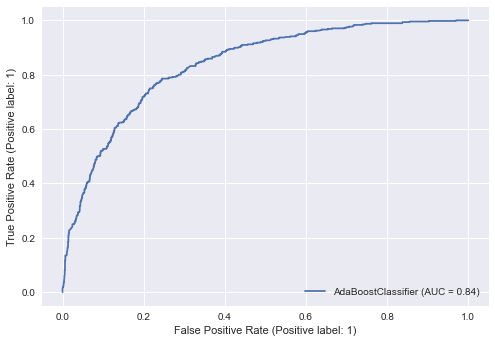

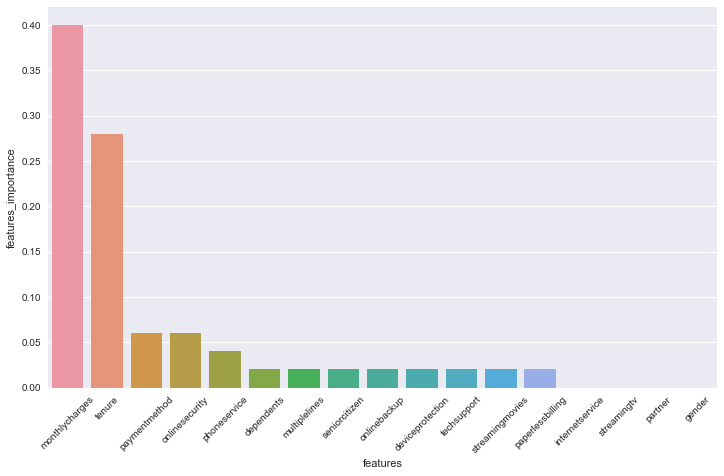

Wall time: 445 ms


In [24]:
%%time
from sklearn.ensemble import AdaBoostClassifier

abc_params = {'n_estimators' : np.arange(50, 300, 10),
             'base_estimator' : [DecisionTreeClassifier(max_depth=3),
                              DecisionTreeClassifier(max_depth=2),
                              DecisionTreeClassifier(max_depth=1)]}

# abc = train_clf(AdaBoostClassifier(random_state=17, ), abc_params, cv=skf, data=[x_train, y_train])
best_conf_abc = AdaBoostClassifier(n_estimators=50, random_state=17,
                                   base_estimator=DecisionTreeClassifier(max_depth=1),)
abc = best_conf_abc.fit(x_train, y_train)

clf_report(abc, x_test, y_test, features=True)

In [32]:
abc

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=17)

# 4. Сравнение качества моделей 

In [33]:
accuracy =[]
precision = []
recall = []
f1 = []
roc_auc = []


for model in [knn, nb, rfc, dt, svc, xgb, lr, abc]:
    accuracy.append(accuracy_score(y_test, model.predict(x_test)))
    precision.append(precision_score(y_test, model.predict(x_test)))
    recall.append(recall_score(y_test, model.predict(x_test)))
    f1.append(f1_score(y_test, model.predict(x_test)))
    try:
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
    except: roc_auc.append(roc_auc_score(y_test, model.predict(x_test)))
    
df = pd.DataFrame({'Accuracy score' : accuracy,
                   'Precision score' : precision,
                   'Recall score': recall,
                   'f1 score' : f1,
                   'ROC AUC score' : roc_auc},
                  index = ['KNeighborsClassifier', 'GaussianNB','RandomForestClassifier',
                              'DecisionTreeClassifier', 'SVC', 'XGBClassifier', 
                             'LogisticRegression', 'AdaBoostClassifier'])

In [34]:
df.sort_values('ROC AUC score', ascending=False)

,Accuracy score,Precision score,Recall score,f1 score,ROC AUC score
RandomForestClassifier,0.760579,0.533237,0.775210,0.631849,0.839859
AdaBoostClassifier,0.801782,0.663934,0.510504,0.577197,0.837825
LogisticRegression,0.802339,0.667590,0.506303,0.575866,0.835270
XGBClassifier,0.758909,0.531852,0.754202,0.623805,0.835174
SVC,0.744989,0.512535,0.773109,0.616415,0.834874
DecisionTreeClassifier,0.741091,0.507779,0.754202,0.606932,0.818615
GaussianNB,0.771158,0.557726,0.659664,0.604427,0.812732
KNeighborsClassifier,0.764477,0.588629,0.369748,0.454194,0.766755


Так как для компании важнее не допусть отток клиента, увелчим метрику recall жертвуя показателем precision для самой лучшей модели.

Итоговая конфигурация и показители качесвта модели

In [35]:
# final_conf_model = AdaBoostClassifier(n_estimators=50, random_state=17,
#                                    base_estimator=DecisionTreeClassifier(max_depth=1),)
# best_clf = final_conf_model.fit(x_train, y_train)

# clf_report(best_clf, x_test, y_test, features=True)